In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

matplotlib.rcParams['pdf.fonttype'] = 42
%matplotlib inline

In [55]:
df = pd.read_csv("data/generic_poll_lead.csv")
df

,year,lead,in_power
0,2018,13.4,no
1,2016,1.2,yes
2,2014,3.0,yes
3,2012,1.5,no
4,2010,0.4,no
5,2008,11.0,no
6,2006,10.2,no
7,2004,2.5,no
8,2002,0.2,yes
9,2000,4.8,yes


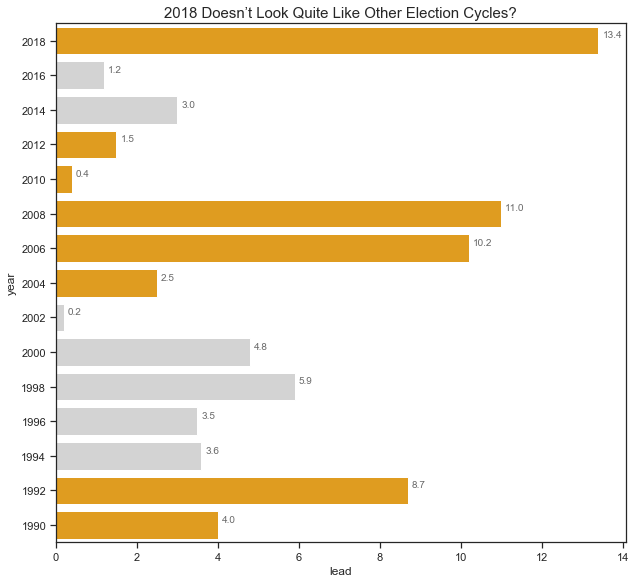

In [96]:
sns.set(rc={'figure.figsize':(9,8.27)})
sns.set_style('ticks') 
def build_colors(row):
    if row['in_power'] == 'no':
        return '#FFA500'
    else:
        return 'lightgrey'

colors = df.reset_index().apply(build_colors, axis=1)

ax = sns.barplot(data=df,
            x='lead', y = 'year', palette = colors, 
            orient='h',order = df['year'])
for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')
plt.title('2018 Doesn’t Look Quite Like Other Election Cycles?', fontsize = 15)

plt.tight_layout()
plt.savefig('output.pdf')

In [6]:
df2 = pd.read_csv("data/social-spending.csv")
df2

,Country,Social Spending
0,France,31.5%
1,Finland,30.8%
2,Belgium,29.0%
3,Italy,28.9%
4,Denmark,28.7%
5,Austria,27.8%
6,Sweden,27.1%
7,Greece,25.0%
8,Germany,25.3%
9,Norway,25.1%


In [15]:
df2['Social_Spending'] = df2['Social Spending'].str.extract(r'(.*)%')
df2['Social_Spending'] = df2['Social_Spending'].astype(float)
df2

,Country,Social Spending,Social_Spending
0,France,31.5%,31.5
1,Finland,30.8%,30.8
2,Belgium,29.0%,29.0
3,Italy,28.9%,28.9
4,Denmark,28.7%,28.7
5,Austria,27.8%,27.8
6,Sweden,27.1%,27.1
7,Greece,25.0%,25.0
8,Germany,25.3%,25.3
9,Norway,25.1%,25.1


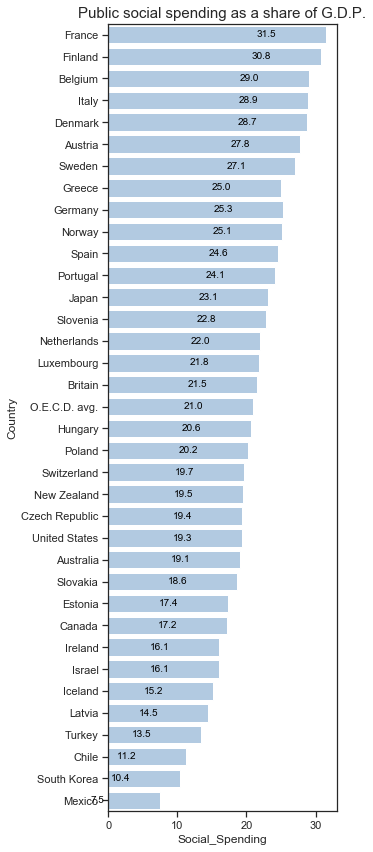

In [60]:
sns.set(rc={'figure.figsize':(5,12)})
sns.set_style('ticks') 

ax = sns.barplot(data=df2, y='Country', x = 'Social_Spending', orient='h', color = '#aacae9')
for i in ax.patches:
    ax.text(i.get_width()-10, i.get_y()+.5, \
            str(round((i.get_width()), 2)), fontsize=10, color='black')

plt.title('Public social spending as a share of G.D.P.', fontsize = 15)

plt.tight_layout()
plt.savefig('output2.pdf')

In [3]:
df3 = pd.read_csv('data/cook_pvi.csv')
df3

,cook_pvi,pct_defeated
0,C+7 or greater,76
1,C+3 to C+7,63
2,C+1 to C+3,61
3,I+1 to C+1,35
4,I+1 to I+3,25
5,I+3 to I+5,18
6,I+5 to I+10,7
7,I+10 or greater,0


In [4]:
df3['pct_survived'] = 100-df3['pct_defeated']
df3

,cook_pvi,pct_defeated,pct_survived
0,C+7 or greater,76,24
1,C+3 to C+7,63,37
2,C+1 to C+3,61,39
3,I+1 to C+1,35,65
4,I+1 to I+3,25,75
5,I+3 to I+5,18,82
6,I+5 to I+10,7,93
7,I+10 or greater,0,100


In [5]:
df3.columns

Index(['cook_pvi', 'pct_defeated', 'pct_survived'], dtype='object')

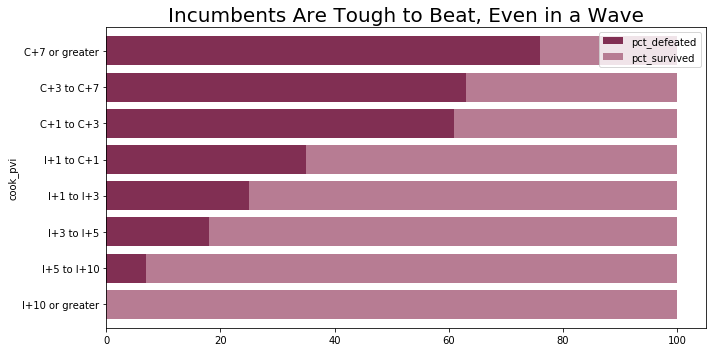

In [6]:
ax = df3.plot(kind = 'barh', x = 'cook_pvi',y = ['pct_defeated','pct_survived'], 
         stacked = True, figsize = [10,5], width = 0.8, color = ['#812F53','#B77C93'])
plt.gca().invert_yaxis()


plt.title('Incumbents Are Tough to Beat, Even in a Wave',fontsize = 20)
plt.tight_layout()
plt.savefig('output3.pdf')